# Convolutional Neural Network
## The CIFAR-10 dataset

### Juan Fernando González
20170085

## Libraries

In [1]:
import keras
from keras.utils import plot_model
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard 
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

import numpy as np
from time import time
import matplotlib.pyplot as plt
import pydot 

%matplotlib inline

Using TensorFlow backend.


## Load Data

In [2]:
# The data, split between train and test sets:

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

## Initial Exploration

Let's see the shapes of the train and test data.

In [3]:
print('X Train data shape: ', X_train.shape)
print('X Test data shape: ', X_test.shape)
print('Y Train data shape: ', y_train.shape)
print('Y Test data shape: ', y_test.shape)

X Train data shape:  (50000, 32, 32, 3)
X Test data shape:  (10000, 32, 32, 3)
Y Train data shape:  (50000, 1)
Y Test data shape:  (10000, 1)


In total there are 60000 features.

Ther are 10 different classes to be classified in this dataset:
    
    1. Airplane ✈️
    2. Automobile 🚗
    3. Bird 🦜
    4. Cat 🐱
    5. Deer 🦌
    6. Dog 🐶
    7. Frog 🐸
    8. Horse 🐴
    9. Ship 🛥
    10. Truck 🚚

In [4]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

#### Example of an image display

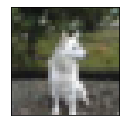

Class: dog


In [5]:
i = 750
fig,ax=plt.subplots(figsize=(2,2))
ax.set_xticks([])
ax.set_yticks([])
ax.grid(False)
ax.imshow(X_train[i])
plt.show()
print("Class: {}".format(classes[int(y_train[i])]))

### Normalize data

Let's scale the features (pixels) to 0 - 1 and convert the type to float for computational performance.

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

#### One Hot Encoding 

In [7]:
# Convert class vectors to binary class matrices. This is called one hot encoding.

#y_train = keras.utils.to_categorical(y_train, len(classes))
#y_test = keras.utils.to_categorical(y_test, len(classes))

## CNN Architecture

In [8]:
# Define the CNN 

CNN = Sequential(name='Cool CNN')

### Convlolutional layers

In [9]:
#convlolutional layers

CNN.add(Conv2D(32, kernel_size=(9, 9), activation='relu', input_shape=(32,32,3)))
CNN.add(MaxPooling2D(pool_size=(2,2)))

CNN.add(Conv2D(64, kernel_size=(9, 9), activation='relu'))
CNN.add(MaxPooling2D(pool_size=(2,2)))
CNN.add(Dropout(0.25))


### Dense layers

In [10]:
# dense layers
CNN.add(Flatten())
CNN.add(Dense(256, activation='relu'))
CNN.add(Dropout(0.30))
CNN.add(Dense(10, activation='softmax'))

### Compile the Model

In [11]:
# Compile the model
#opt = keras.optimizers.SGD(learning_rate=0.0001, momentum=0.0)

CNN.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(CNN.summary())

Model: "Cool CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        7808      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          165952    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               657

## Trainning the Model

In [ ]:
model_history = CNN.fit(X_train, y_train,
                          batch_size = 32,
                          epochs = 50,
                          validation_split = 0.2,
                          shuffle=True, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 74s 2ms/step - loss: 2.0452 - accuracy: 0.2382 - val_loss: 1.8007 - val_accuracy: 0.3365
Epoch 2/50
40000/40000 [==============================] - 77s 2ms/step - loss: 1.7327 - accuracy: 0.3659 - val_loss: 1.5908 - val_accuracy: 0.4226
Epoch 3/50
40000/40000 [==============================] - 73s 2ms/step - loss: 1.5854 - accuracy: 0.4244 - val_loss: 1.5318 - val_accuracy: 0.4479
Epoch 4/50
40000/40000 [==============================] - 72s 2ms/step - loss: 1.5019 - accuracy: 0.4588 - val_loss: 1.4207 - val_accuracy: 0.4890
Epoch 5/50
40000/40000 [==============================] - 68s 2ms/step - loss: 1.4521 - accuracy: 0.4782 - val_loss: 1.3739 - val_accuracy: 0.5100
Epoch 6/50
40000/40000 [==============================] - 67s 2ms/step - loss: 1.4037 - accuracy: 0.4936 - val_loss: 1.3373 - val_accuracy: 0.5312
Epoch 7/50
40000/40000 [==============================] - 66s 2ms/st

## Analize training history and results

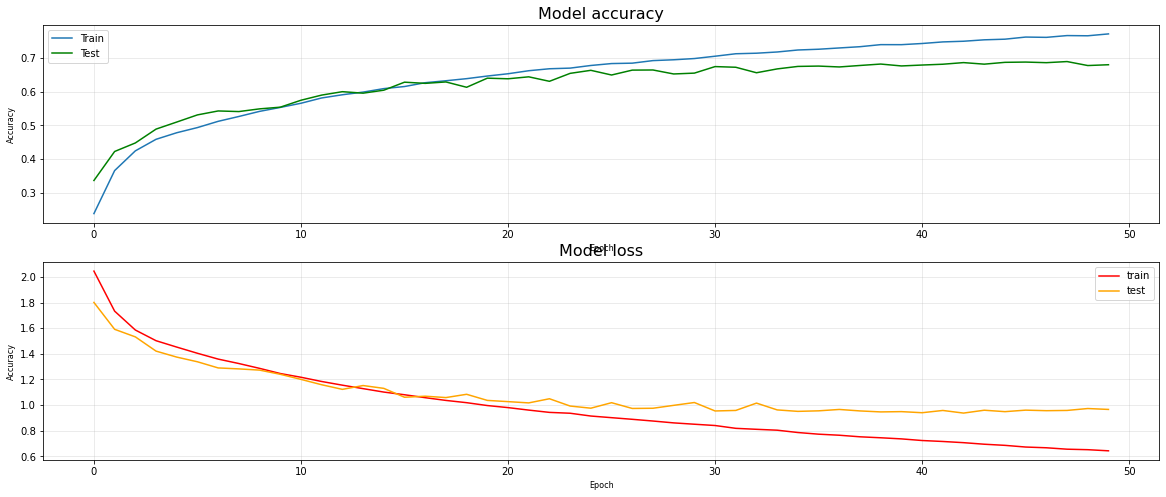

In [15]:
def plot_hist(model_history):
    fix,axs=plt.subplots(2,1,figsize=(20,8))
    ax1 = axs[0]
    ax1.plot(model_history.history['accuracy'])
    ax1.plot(model_history.history['val_accuracy'],c='g')
    ax1.set_title('Model accuracy',fontsize=16)
    ax1.set_ylabel('Accuracy',fontsize=8)
    ax1.set_xlabel('Epoch',fontsize=8)
    ax1.grid(alpha=0.3)
    ax1.legend(['Train', 'Test'], loc='upper left')


    # # summarize history for loss
    ax2 = axs[1]
    ax2.plot(model_history.history['loss'],c='r')
    ax2.plot(model_history.history['val_loss'],c='orange')
    ax2.set_title('Model loss',fontsize=16)
    ax2.set_ylabel('Accuracy',fontsize=8)
    ax2.set_xlabel('Epoch',fontsize=8)
    ax2.grid(alpha=0.3)
    ax2.legend(['train', 'test'], loc='upper right')
    plt.show()
    
plot_hist(model_history)

In [16]:
test_loss, test_acc = CNN.evaluate(X_test, y_test)

print('\nTest accuracy:', test_acc)
print('Test loss:    ', test_loss)

10000/10000 [==============================] - 3s 321us/step

Test accuracy: 0.6794999837875366
Test loss:     0.970308075428009


In [18]:
# make prediction.
pred = CNN.predict(X_test)

In [26]:
# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, len(classes))
y_test = keras.utils.to_categorical(y_test, len(classes))

In [27]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = X_test[errors]

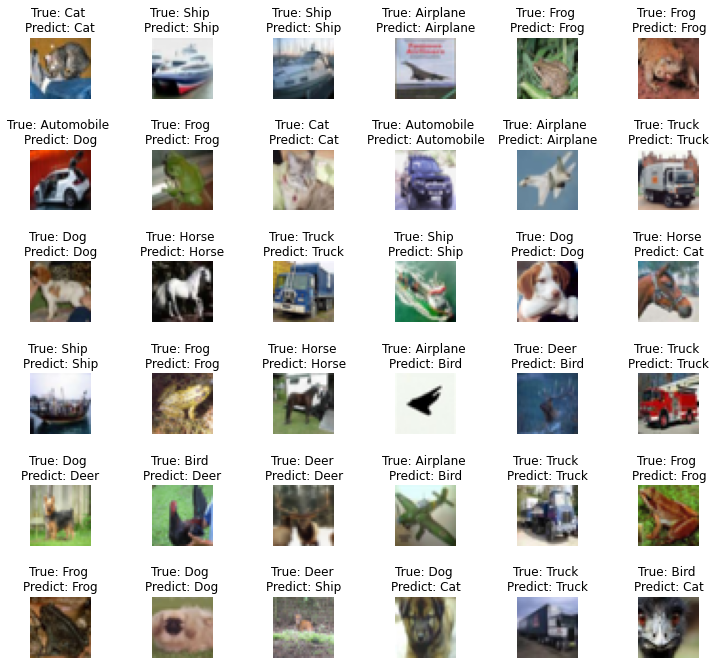

In [32]:
R = 6
C = 6
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[Y_true[i]], labels[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)